In [102]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.stats.multicomp import pairwise_tukeyhsd

Задания 

    Первый шаг – загрузить данные и убедиться, что всё считалось правильно: посмотреть на столбцы, размер, наличие пропущенных значений (если есть – удалить). Также изучите типы переменных.
    Постройте график распределения количества выпущенных игр по годам и выведите описательные характеристики переменной Year.
    На каких платформах произошло больше всего релизов?
    Игры каких издателей (Publisher) встречаются в датасете чаще всего?
    В каком регионе медианное значение объема продаж игр Nintendo является наибольшим? (Регионы: NA, EU, JP, Other)
    Изучите объемы продаж игр Nintendo в Японии с разбивкой жанрам. Посмотрите на медиану, среднее, межквартильный размах.
    Визуализируйте динамику изменения объема мировых продаж (Global_Sales) по годам для игр Nintendo следующих жанров: Fighting, Simulation, Platform, Racing, Sports. В какие моменты времени было продано больше всего игр жанра Sports?

Описание данных

Имеются следующие поля:

    Rank – место по объему продаж
    Name – название игры
    Platform – платформа, на которой выпущена игра
    Year – год релиза
    Genre – жанр
    Publisher – издатель
    NA_Sales – продажи в Северной Америке, в млн.
    EU_Sales – продажи в Европе, в млн.
    JP_Sales – продажи в Японии, в млн.
    Other_Sales – продажи в остальном мире, в млн.
    Global_Sales – продажи по всему миру, в млн.


In [18]:
df = pd.read_csv('games.csv')
df.dropna(inplace=True)
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


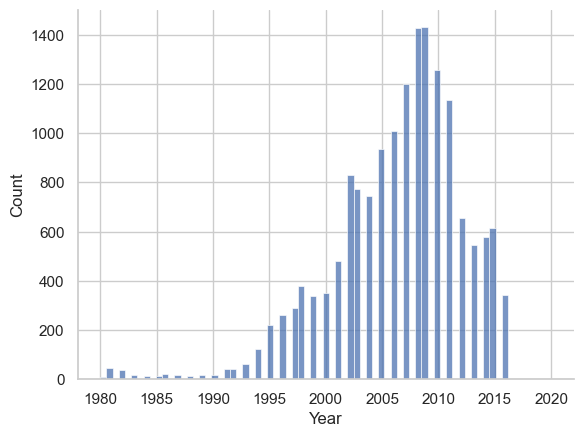

In [57]:
sns.histplot(df.Year)
sns.set(style="whitegrid")
sns.despine()

In [53]:
df.Year.describe()

count    16291.000000
mean      2006.405561
std          5.832412
min       1980.000000
25%       2003.000000
50%       2007.000000
75%       2010.000000
max       2020.000000
Name: Year, dtype: float64

In [60]:
df.Platform.value_counts().idxmax()

'DS'

In [61]:
df.Publisher.value_counts().idxmax()

'Electronic Arts'

In [70]:
df[df['Publisher'] == 'Nintendo'][['NA_Sales', "EU_Sales", "JP_Sales"]].median().idxmax()

'NA_Sales'

In [97]:
JP_nint = df[df['Publisher'] == 'Nintendo']['JP_Sales']
JP_nint

0         3.77
1         6.81
2         3.79
3         3.28
4        10.22
         ...  
16269     0.01
16357     0.01
16456     0.01
16473     0.01
16542     0.01
Name: JP_Sales, Length: 696, dtype: float64

In [90]:
print(JP_nint.median(), JP_nint.mean(), JP_nint.quantile(0.75)-JP_nint.quantile(0.25))

0.28 0.6537212643678154 0.65


In [98]:
JP_nint.describe()

count    696.000000
mean       0.653721
std        1.063110
min        0.000000
25%        0.090000
50%        0.280000
75%        0.740000
max       10.220000
Name: JP_Sales, dtype: float64

In [114]:
df_nint_gen = df[(df['Publisher'] == 'Nintendo') & 
                 (df['Genre'].isin(['Fighting', 'Simulation', 'Platform', 'Racing', 'Sports']))]
df_nint_gen

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
6,7,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
...,...,...,...,...,...,...,...,...,...,...,...
12123,12125,Mario Tennis,Wii,2010.0,Sports,Nintendo,0.00,0.06,0.00,0.01,0.07
12770,12772,Dance Dance Revolution: Mario Mix (JP sales),GC,2005.0,Simulation,Nintendo,0.00,0.00,0.05,0.00,0.06
14626,14629,Calcio Bit,GBA,2006.0,Sports,Nintendo,0.00,0.00,0.03,0.00,0.03
14968,14971,Teddy Together,3DS,2016.0,Simulation,Nintendo,0.00,0.02,0.00,0.00,0.02


<AxesSubplot:xlabel='Year', ylabel='Global_Sales'>

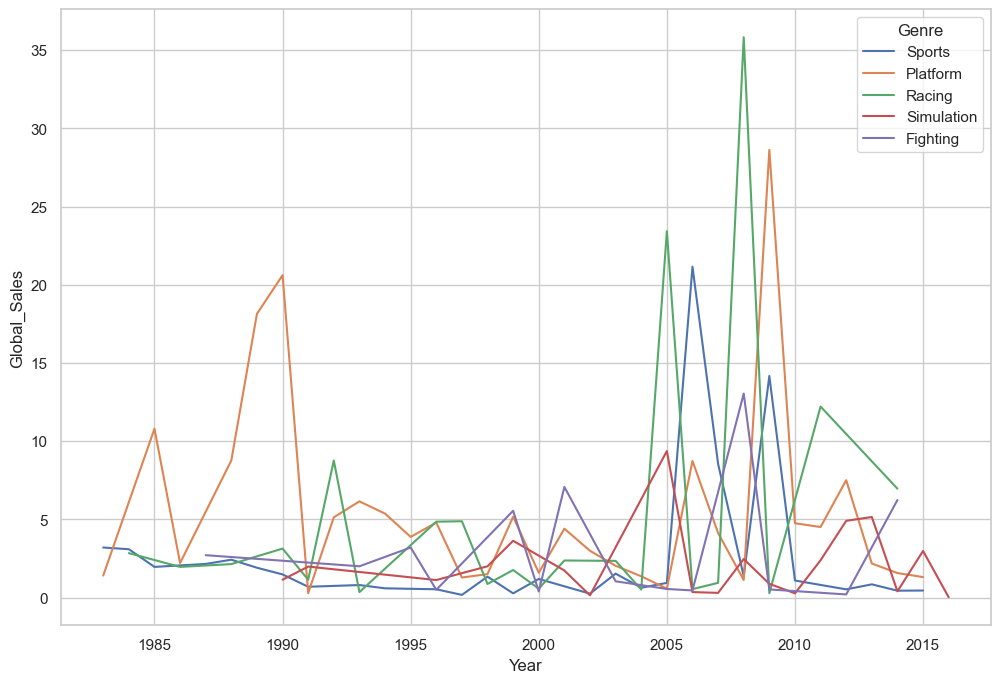

In [122]:
plt.figure(figsize=(12, 8))
sns.lineplot(data=df_nint_gen, x='Year', y='Global_Sales', hue='Genre', errorbar=None)

In [127]:
df_nint_gen[df_nint_gen.Genre == 'Sports'][['Year', 'Global_Sales']].sort_values(by='Global_Sales', ascending=False).head()

,Year,Global_Sales
0,2006.0,82.74
3,2009.0,33.00
13,2007.0,22.72
14,2009.0,22.00
298,1984.0,4.01


Задание

    Загрузите данные, проверьте число наблюдений и столбцов, типы данных, наличие пропущенных значений, какие уникальные значения встречаются.
    Постройте график распределения числа показов (Impressions) для каждой рекламы, прологарифмировав значения
    Создайте новую колонку c CTR. Посмотрите на описательные статистики и распределение.
    Проанализируйте CTR с разбивкой по рекламной кампании.
    Посчитайте стоимость за клик пользователя по объявлению (CPC). Изучите полученные значения, используя меры центральной тенденции и меры изменчивости. 
    Визуализируйте CPC с разбивкой по полу пользователей, которым были показаны объявления. 
    Посчитайте конверсию из клика в покупку.

Описание данных

    ad_id – идентификатор объявления (рекламы)
    xyz_campaign_id – идентификатор рекламной кампании в базе компании X
    fb_campaign_id – идентификатор кампании в Facebook
    age – возрастная группа, которой показывалась реклама
    gender – пол тех, кому показывалась реклама
    interest –код, указывающий категорию, к которой относится интерес пользователя (соответствие число – интерес)
    impressions – число показов
    clicks – число кликов
    spent – сумма, которую компания потратила на показ объявления 
    total_conversion – количество людей, которые заинтересовались продуктом после просмотра рекламы
    approved_conversion – количество людей, которые купили продукт после просмотра рекламы






In [131]:
df = pd.read_csv('conversion.csv')
df

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
0,708746,916,103916,30-34,M,15,7350,1,1.430000,2,1
1,708749,916,103917,30-34,M,16,17861,2,1.820000,2,0
2,708771,916,103920,30-34,M,20,693,0,0.000000,1,0
3,708815,916,103928,30-34,M,28,4259,1,1.250000,1,0
4,708818,916,103928,30-34,M,28,4133,1,1.290000,1,1
...,...,...,...,...,...,...,...,...,...,...,...
1138,1314410,1178,179977,45-49,F,109,1129773,252,358.189997,13,2
1139,1314411,1178,179978,45-49,F,110,637549,120,173.880003,3,0
1140,1314412,1178,179979,45-49,F,111,151531,28,40.289999,2,0
1141,1314414,1178,179981,45-49,F,113,790253,135,198.710001,8,2


In [133]:
df.nunique()

ad_id                  1143
xyz_campaign_id           3
fb_campaign_id          691
age                       4
gender                    2
interest                 40
Impressions            1130
Clicks                  183
Spent                   869
Total_Conversion         32
Approved_Conversion      16
dtype: int64

In [135]:
df.isna().sum()

ad_id                  0
xyz_campaign_id        0
fb_campaign_id         0
age                    0
gender                 0
interest               0
Impressions            0
Clicks                 0
Spent                  0
Total_Conversion       0
Approved_Conversion    0
dtype: int64

<AxesSubplot:xlabel='Impressions', ylabel='Density'>

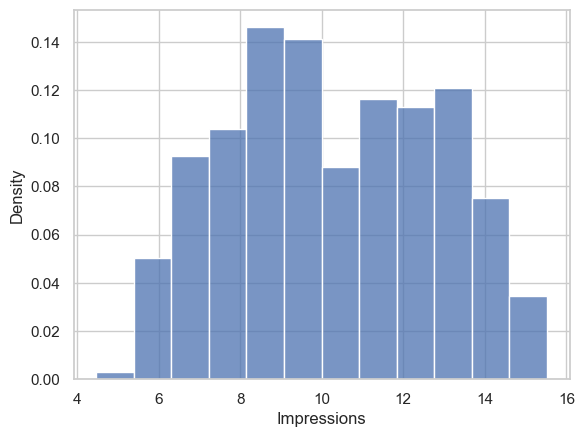

In [156]:
sns.histplot(np.log(df.groupby('fb_campaign_id').Impressions.sum()), stat='density')

In [159]:
df['CTR'] = df.Clicks/df.Impressions
df.CTR.describe()

count    1143.000000
mean        0.000164
std         0.000115
min         0.000000
25%         0.000100
50%         0.000160
75%         0.000234
max         0.001059
Name: CTR, dtype: float64

<AxesSubplot:xlabel='CTR', ylabel='Density'>

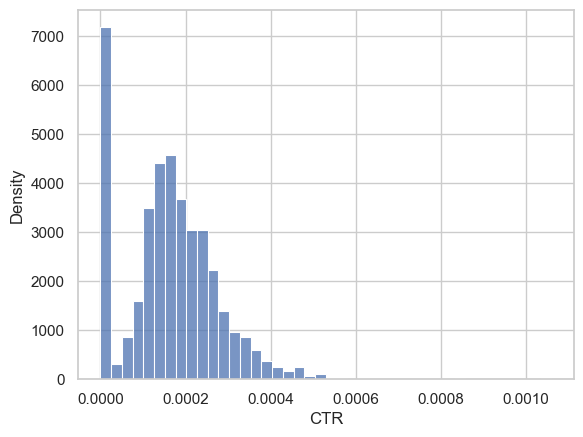

In [166]:
sns.histplot(df.CTR, stat='density')

<AxesSubplot:xlabel='CTR', ylabel='Count'>

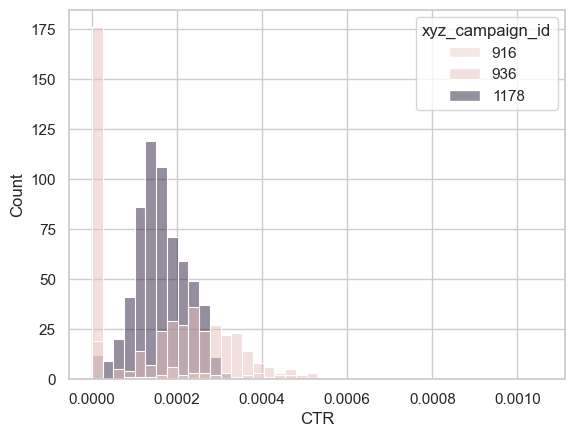

In [172]:
sns.histplot(data=df, x='CTR', hue='xyz_campaign_id')

In [180]:
df['CPC'] = df.Spent/df.Clicks
df.describe().CPC

count    936.000000
mean       1.499347
std        0.232879
min        0.180000
25%        1.390000
50%        1.498273
75%        1.644364
max        2.212000
Name: CPC, dtype: float64

<AxesSubplot:xlabel='CPC', ylabel='Count'>

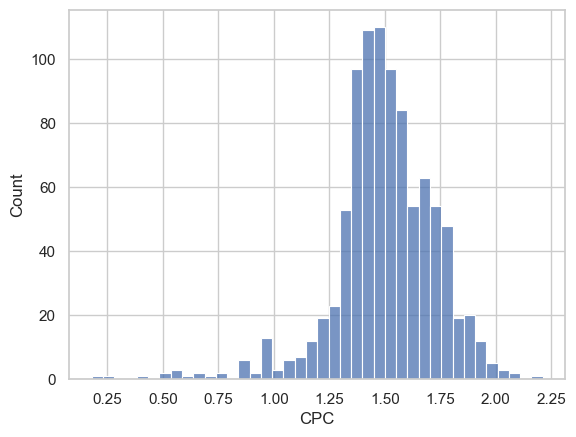

In [178]:
sns.histplot(df.CPC.dropna())

<AxesSubplot:xlabel='CPC', ylabel='Count'>

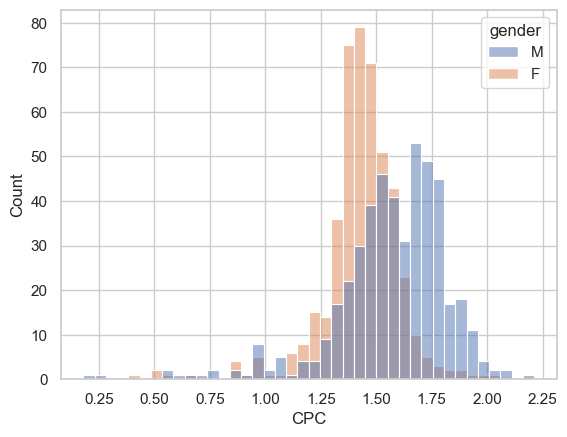

In [182]:
sns.histplot(data=df, x='CPC', hue='gender')

In [187]:
df['CR'] = df.Approved_Conversion/df.Clicks * 100
df

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion,CTR,CPC,CR
0,708746,916,103916,30-34,M,15,7350,1,1.430000,2,1,0.000136,1.430000,100.000000
1,708749,916,103917,30-34,M,16,17861,2,1.820000,2,0,0.000112,0.910000,0.000000
2,708771,916,103920,30-34,M,20,693,0,0.000000,1,0,0.000000,NaN,NaN
3,708815,916,103928,30-34,M,28,4259,1,1.250000,1,0,0.000235,1.250000,0.000000
4,708818,916,103928,30-34,M,28,4133,1,1.290000,1,1,0.000242,1.290000,100.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1138,1314410,1178,179977,45-49,F,109,1129773,252,358.189997,13,2,0.000223,1.421389,0.793651
1139,1314411,1178,179978,45-49,F,110,637549,120,173.880003,3,0,0.000188,1.449000,0.000000
1140,1314412,1178,179979,45-49,F,111,151531,28,40.289999,2,0,0.000185,1.438929,0.000000
1141,1314414,1178,179981,45-49,F,113,790253,135,198.710001,8,2,0.000171,1.471926,1.481481


Задания

    Загрузите данные, проверьте число наблюдений и столбцов, наличие пропусков. Убедитесь, что типы данных были прочитаны правильно. При необходимости – приведите переменные к нужным типам.
    Постройте график по числу поездок по дате и времени.
    Преобразуйте данные и посчитайте число поездок по дням. Визуализируйте результат.
    Используйте агрегированные данные по дням и посчитайте скользящее среднее с окном 3. В качестве ответа укажите полученное число аренд за 2015-07-09, округлив значение до целого.
    Посчитайте разницу между наблюдаемыми и значениями, подсчитанными с помощью скользящего среднего. Далее – найдите стандартное отклонение.
    Определите границы 99% доверительного интервала, добавьте данную информацию в датафрейм.
    Изучите аномально высокие значения и укажите день, когда число аренд было наибольшим. Найдите причину данной аномалии.
    Изучите аномально низкие значения, найдите день с наименьшим числом аренд. Найдите причину данной аномалии.

Описание данных

    timestamp – дата и время (точность до часа)
    cnt – количество аренд велосипедов за этот час
    t1 – температура, в С
    t2 – температура "ощущается как", в С 
    hum – влажность (%)
    wind_speed – скорость ветра, км/ч
    weather_code – погодные условия
        1 – ясно (SKC)
        2 – преимущественно ясно / встречаются отдельные облака (SCT)
        3 – облачно / значительные облака (BKN)
        4 – пасмурно (OVC)
        7 – небольшой дождь Rain/ light Rain shower/ Light rain 
        10 – дождь с грозой
        26 – снегопад 
        94 – ледяной туман (да, такое бывает!)
    isholiday – является ли день праздником (1 – праздник, 0 – нет)
    isweekend –  является ли день выходным (1 – выходной, 0 – нет)
    season – метеорологический сезон (0 – весна, 1 – лето, 2 – осень, 3 – зима)



In [21]:
df = pd.read_csv('london.csv', parse_dates=['timestamp'])
df.head()

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0


In [11]:
df.dtypes

timestamp       datetime64[ns]
cnt                      int64
t1                     float64
t2                     float64
hum                    float64
wind_speed             float64
weather_code           float64
is_holiday             float64
is_weekend             float64
season                 float64
dtype: object

<AxesSubplot:xlabel='timestamp', ylabel='cnt'>

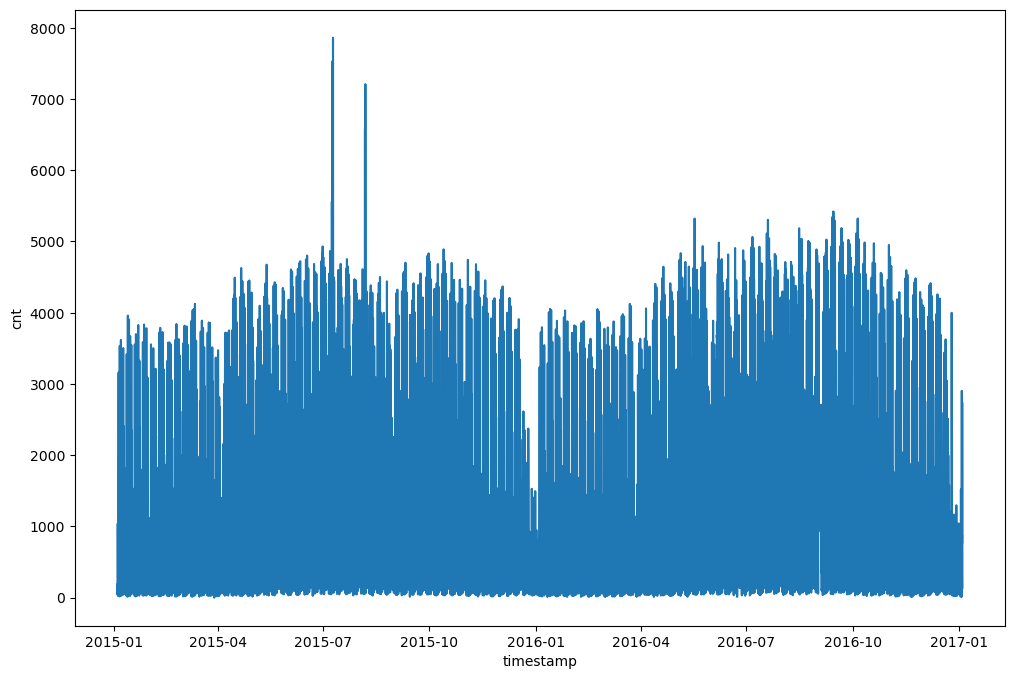

In [17]:
plt.figure(figsize=(12, 8))
sns.lineplot(data=df, x='timestamp', y='cnt')

In [25]:
df.set_index('timestamp', drop=False, inplace=True)
df.sort_index()
df

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
timestamp,,,,,,,,,,
2015-01-04 00:00:00,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
2015-01-04 01:00:00,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2015-01-04 02:00:00,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
2015-01-04 03:00:00,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
2015-01-04 04:00:00,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0
...,...,...,...,...,...,...,...,...,...,...
2017-01-03 19:00:00,2017-01-03 19:00:00,1042,5.0,1.0,81.0,19.0,3.0,0.0,0.0,3.0
2017-01-03 20:00:00,2017-01-03 20:00:00,541,5.0,1.0,81.0,21.0,4.0,0.0,0.0,3.0
2017-01-03 21:00:00,2017-01-03 21:00:00,337,5.5,1.5,78.5,24.0,4.0,0.0,0.0,3.0


<AxesSubplot:xlabel='timestamp'>

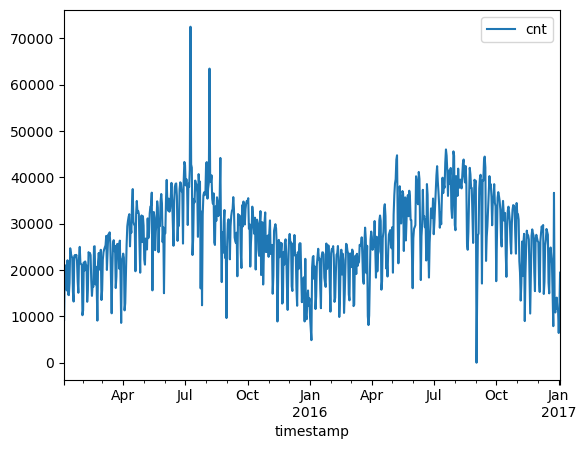

In [37]:
df_by_d = df.resample('D').agg({'cnt' : sum})
df_by_d.plot()

<AxesSubplot:xlabel='timestamp'>

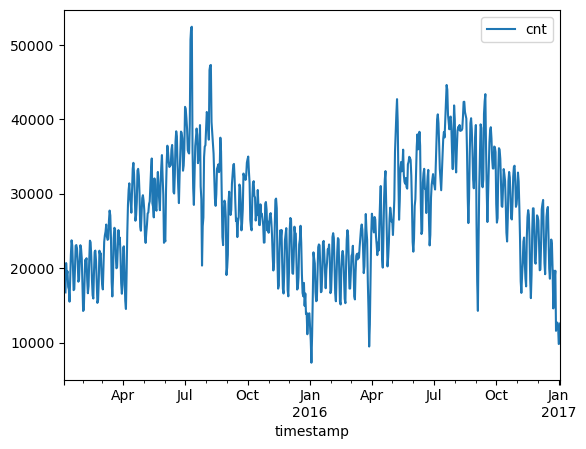

In [36]:
df_by_d.rolling(3).mean().plot()

In [40]:
df_by_d.rolling(3).mean().loc['2015-07-09']

cnt    50705.0
Name: 2015-07-09 00:00:00, dtype: float64

In [61]:
diff = df_by_d['cnt']-df_by_d.rolling(3).mean()['cnt']
diff

timestamp
2015-01-04            NaN
2015-01-05            NaN
2015-01-06    3873.333333
2015-01-07     381.000000
2015-01-08   -3491.666667
                 ...     
2016-12-30   -1116.000000
2016-12-31    -923.333333
2017-01-01   -3382.666667
2017-01-02    1933.666667
2017-01-03    6876.000000
Freq: D, Name: cnt, Length: 731, dtype: float64

In [52]:
diff.std()

4561.716464103279

In [66]:
df_by_d['diff'] = diff.values
df_by_d.reset_index(inplace=True)
df_by_d

,timestamp,cnt,diff
0,2015-01-04,9234,NaN
1,2015-01-05,20372,NaN
2,2015-01-06,20613,3873.333333
3,2015-01-07,21064,381.000000
4,2015-01-08,15601,-3491.666667
...,...,...,...
726,2016-12-30,11566,-1116.000000
727,2016-12-31,11424,-923.333333
728,2017-01-01,6421,-3382.666667
729,2017-01-02,11823,1933.666667


In [73]:
df_by_d['roll'] = df_by_d.set_index('timestamp', drop=False).rolling(3).mean().cnt.values
df_by_d

C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_9776\3461484504.py:1: FutureWarning: Dropping of nuisance columns in rolling operations is deprecated; in a future version this will raise TypeError. Select only valid columns before calling the operation. Dropped columns were Index(['timestamp'], dtype='object')
  df_by_d['roll'] = df_by_d.set_index('timestamp', drop=False).rolling(3).mean().cnt.values


,timestamp,cnt,diff,roll
0,2015-01-04,9234,NaN,NaN
1,2015-01-05,20372,NaN,NaN
2,2015-01-06,20613,3873.333333,16739.666667
3,2015-01-07,21064,381.000000,20683.000000
4,2015-01-08,15601,-3491.666667,19092.666667
...,...,...,...,...
726,2016-12-30,11566,-1116.000000,12682.000000
727,2016-12-31,11424,-923.333333,12347.333333
728,2017-01-01,6421,-3382.666667,9803.666667
729,2017-01-02,11823,1933.666667,9889.333333


In [75]:
k = stats.norm.ppf(0.99)
k

2.3263478740408408

In [92]:
df_by_d['cnt_99-'] = df_by_d['roll'].mean() - k * df_by_d.cnt.std(ddof=1)
df_by_d['cnt_99+'] = df_by_d['roll'].mean() + k * df_by_d.cnt.std(ddof=1)
df_by_d

,timestamp,cnt,diff,roll,cnt_99-,cnt_99+
0,2015-01-04,9234,NaN,NaN,7117.055433,47412.785445
1,2015-01-05,20372,NaN,NaN,7117.055433,47412.785445
2,2015-01-06,20613,3873.333333,16739.666667,7117.055433,47412.785445
3,2015-01-07,21064,381.000000,20683.000000,7117.055433,47412.785445
4,2015-01-08,15601,-3491.666667,19092.666667,7117.055433,47412.785445
...,...,...,...,...,...,...
726,2016-12-30,11566,-1116.000000,12682.000000,7117.055433,47412.785445
727,2016-12-31,11424,-923.333333,12347.333333,7117.055433,47412.785445
728,2017-01-01,6421,-3382.666667,9803.666667,7117.055433,47412.785445
729,2017-01-02,11823,1933.666667,9889.333333,7117.055433,47412.785445


In [93]:
df_by_d[ (df_by_d['cnt'] < df_by_d['cnt_99-']) | (df_by_d['cnt'] > df_by_d['cnt_99+']) ]

,timestamp,cnt,diff,roll,cnt_99-,cnt_99+
186,2015-07-09,72504,21799.000000,50705.000000,7117.055433,47412.785445
214,2015-08-06,63468,16840.666667,46627.333333,7117.055433,47412.785445
364,2016-01-03,4869,-2418.000000,7287.000000,7117.055433,47412.785445
607,2016-09-02,0,-26086.333333,26086.333333,7117.055433,47412.785445
728,2017-01-01,6421,-3382.666667,9803.666667,7117.055433,47412.785445




На этот раз ситуация следующая: вы работаете в приложении по доставке готовых продуктов. К вам пришел коллега с результатами двух тестов:

    В первом тестировали разрешение фотографий блюд в приложении: пользователям показывались либо прямоугольные, либо новые квадратные 
    Во втором: была обновлена кнопка заказа, и часть юзеров видела старый вариант, а часть – новый

Коллега пришел к вам с просьбой: он посмотрел на графики и предположил, что среди групп могут встретиться различия. Ваша задача – помочь ему проверить гипотезы, сделать соответствующие выводы на основе статистических тестов и принять решения.
Задания:

    Выберите метод, который предположительно подойдет в первом вопросе.
    Проверьте, являются ли дисперсии внутри групп гомогенными.
    Проведите тест на нормальность распределения.
    Сравните средние в представленных группах.
    Используйте критерий Тьюки и определите, между какими группами есть статистически значимые различия. 
    Примите решение: какие картинки в итоге будем использовать?
    Выберите метод для второго теста.
    Визуализируйте распределение events для контрольной и тестовой групп. 
    Посмотрите на описательные статистики events в разбивке по группе и по сегменту пользователя. 
    - 11.Выберите формулу для модели, проведите тест.

Описание данных

5_task_1:

    id – id клиента в эксперименте
    group – в каком разрешении показывались картинки (A – прямоугольные 16:9, B – квадратные, C – прямоугольные 12:4)
    events – сколько блюд суммарно было заказано за период

5_task_2:

    id – id клиента в эксперименте
    segment – сегмент (high/low)
    group – вид кнопки (control – старая версия, test – новая версия)
    events – сколько блюд суммарно было заказано за период




In [2]:
df = pd.read_csv('5_task_1.csv')
df

,id,group,events
0,16046,A,14
1,18712,A,41
2,3268,A,30
3,22633,A,37
4,28071,A,38
...,...,...,...
29995,22932,C,38
29996,21787,C,25
29997,5054,C,34
29998,10254,C,27


In [7]:
df.nunique()

id        30000
group         3
events       81
dtype: int64

In [6]:
df.isna().sum()

id        0
group     0
events    0
dtype: int64

In [12]:
df.groupby('group').agg({'events' : [np.mean, np.std]})

events           
          mean        std
group                    
A      29.5796  10.079376
B      37.6136   9.848360
C      27.4703   9.959048

Задание

Представьте, что вы работаете аналитиком в очень крупной компании по доставке пиццы над приложением для курьеров (да, обычно в таких компаниях есть приложение для курьеров и отдельно приложение для потребителей).

У вас есть несколько ресторанов в разных частях города и целый штат курьеров. Но есть одна проблема, к вечеру скорость доставки падает из-за того, что курьеры уходят домой после рабочего дня, а количество заказов лишь растет. Это приводит к тому, что в момент пересмены наша доставка очень сильно проседает в эффективности. 

Наши data scientist-ы придумали новый алгоритм, который позволяет курьерам запланировать свои последние заказы перед окончанием рабочего дня так, чтобы их маршрут доставки совпадал с маршрутом до дома. То есть, чтобы курьеры доставляли последние свои заказы за день как бы "по пути" домой. 

Вы вместе с командой решили раскатить A/B тест на две равные группы курьеров. Часть курьеров использует старый алгоритм без опции "по пути", другие видят в своем приложении эту опцию и могут ее выбрать. Ваша задача – проанализировать данные эксперимента и помочь бизнесу принять решение о раскатке новой фичи на всех курьеров.

Описание данных

    order_id - id заказа
    delivery_time - время доставки в минутах
    district - район доставки
    experiment_group - экспериментальная группа



In [105]:
df = pd.read_csv('experiment_lesson_4.csv')
df

,order_id,delivery_time,district,experiment_group
0,3159,44.0,Purlieus,control
1,10426,51.0,Purlieus,control
2,9155,46.0,Purlieus,control
3,10699,34.0,Purlieus,control
4,10061,43.0,Purlieus,control
...,...,...,...,...
20191,14561,42.0,Suburb,test
20192,12015,32.0,Suburb,test
20193,20077,23.0,Purlieus,test
20194,14861,41.0,Central,test


In [17]:
df.isna().sum()

order_id            0
delivery_time       0
district            0
experiment_group    0
dtype: int64

In [22]:
df_control = df.query("experiment_group == 'control'")
df_test = df.query("experiment_group == 'test'")

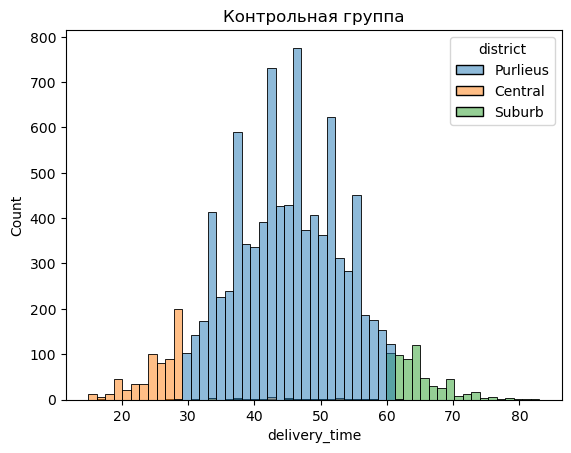

In [42]:
sns.histplot(data = df_control, x='delivery_time', hue='district').set(title='Контрольная группа');

In [97]:
stats.shapiro(df_control.sample(1000).delivery_time)

ShapiroResult(statistic=0.9974332451820374, pvalue=0.1164579689502716)

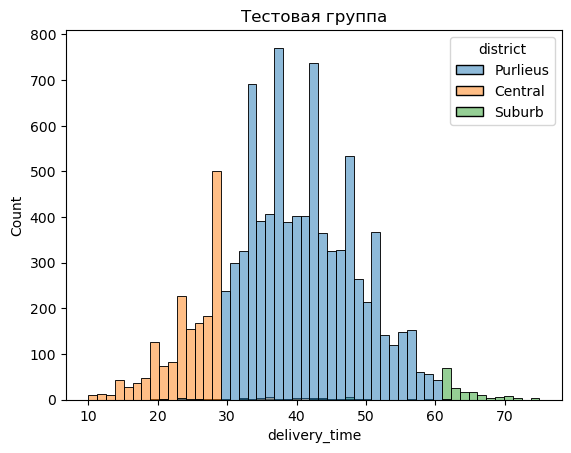

In [58]:
sns.histplot(data = df_test, x='delivery_time', hue='district').set(title='Тестовая группа');

In [98]:
stats.shapiro(df_test.sample(1000).delivery_time)

ShapiroResult(statistic=0.9975720047950745, pvalue=0.14565153419971466)

In [104]:
df

20194

ShapiroResult(statistic=0.7591472268104553, pvalue=1.4419035756677898e-29)

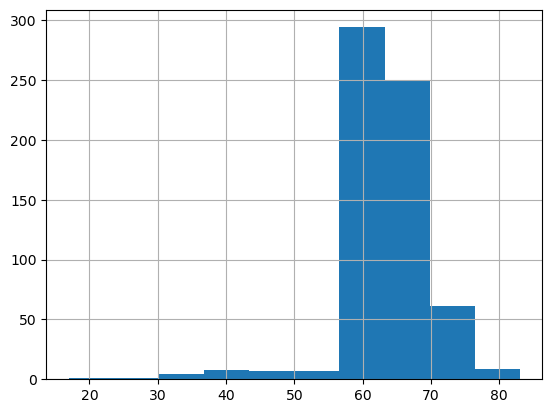

In [114]:
df.query("district=='Suburb' and experiment_group=='control' ").delivery_time.hist()
stats.shapiro(df.query("district=='Suburb' and experiment_group=='control' ").delivery_time)

In [20]:
df_all = df.groupby(["experiment_group"]).agg({'delivery_time' : [np.mean, np.std]})
df_all

delivery_time          
                          mean       std
experiment_group                        
control              45.065101  9.990017
test                 39.046813  9.883308

In [75]:
control_mean = df_all.loc['control', ('delivery_time', 'mean')]
control_std = df_all.loc['control', ('delivery_time', 'std')]
control_n = df.query("experiment_group == 'control'").shape[0]
test_n = df.query("experiment_group == 'test'").shape[0]
test_mean = df_all.loc['test', ('delivery_time', 'mean')]
test_std = df_all.loc['test', ('delivery_time', 'std')]

In [96]:
se = np.sqrt(control_std**2/control_n + test_std**2/test_n)
t_score = (control_mean - test_mean)/se
stats.t.pdf(x=t_score, df=test_n+control_n-2)

0.0

In [82]:
stats.ttest_ind(df_control.delivery_time, df_test.delivery_time)

Ttest_indResult(statistic=43.03582663183714, pvalue=0.0)



На этот раз ситуация следующая: вы работаете в приложении по доставке готовых продуктов. К вам пришел коллега с результатами двух тестов:

    В первом тестировали разрешение фотографий блюд в приложении: пользователям показывались либо прямоугольные, либо новые квадратные 
    Во втором: была обновлена кнопка заказа, и часть юзеров видела старый вариант, а часть – новый

Коллега пришел к вам с просьбой: он посмотрел на графики и предположил, что среди групп могут встретиться различия. Ваша задача – помочь ему проверить гипотезы, сделать соответствующие выводы на основе статистических тестов и принять решения.
Задания:

    Выберите метод, который предположительно подойдет в первом вопросе.
    Проверьте, являются ли дисперсии внутри групп гомогенными.
    Проведите тест на нормальность распределения.
    Сравните средние в представленных группах.
    Используйте критерий Тьюки и определите, между какими группами есть статистически значимые различия. 
    Примите решение: какие картинки в итоге будем использовать?
    Выберите метод для второго теста.
    Визуализируйте распределение events для контрольной и тестовой групп. 
    Посмотрите на описательные статистики events в разбивке по группе и по сегменту пользователя. 
    - 11.Выберите формулу для модели, проведите тест.

Описание данных

5_task_1:

    id – id клиента в эксперименте
    group – в каком разрешении показывались картинки (A – прямоугольные 16:9, B – квадратные, C – прямоугольные 12:4)
    events – сколько блюд суммарно было заказано за период

5_task_2:

    id – id клиента в эксперименте
    segment – сегмент (high/low)
    group – вид кнопки (control – старая версия, test – новая версия)
    events – сколько блюд суммарно было заказано за период




In [206]:
df = pd.read_csv("5_task_1.csv")
df

,id,group,events
0,16046,A,14
1,18712,A,41
2,3268,A,30
3,22633,A,37
4,28071,A,38
...,...,...,...
29995,22932,C,38
29996,21787,C,25
29997,5054,C,34
29998,10254,C,27


In [207]:
df.isna().sum()

id        0
group     0
events    0
dtype: int64

In [208]:
df.nunique()

id        30000
group         3
events       81
dtype: int64

<center> Сравниваются три средних по одному признаку --->  однофакторный anova

<center>Проверим гомогенность дисперсий

In [209]:
df_A = df.query('group == "A"')
df_B = df.query('group == "B"')
df_C = df.query('group == "C"')
df_A.head(3)

,id,group,events
0,16046,A,14
1,18712,A,41
2,3268,A,30


In [210]:
stats.levene(df_A.events, df_B.events, df_C.events)

LeveneResult(statistic=2.2622596339318037, pvalue=0.1041327199523974)

<center>Проверим нормальностью выборок</center>

10000
10000
10000


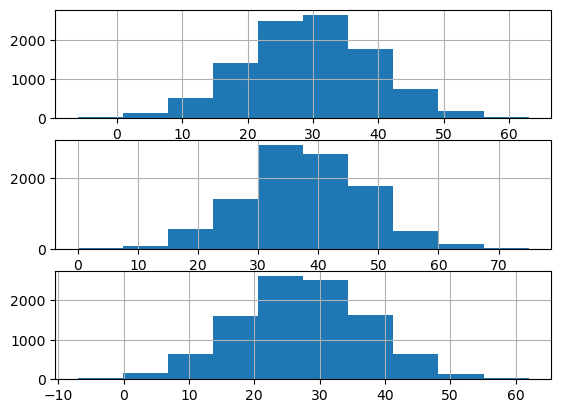

In [211]:
fig, ax = plt.subplots(3, 1)
df_A.events.hist(ax = ax[0])
df_B.events.hist(ax = ax[1])
df_C.events.hist(ax = ax[2])

print(df_A.shape[0])
print(df_B.shape[0])
print(df_C.shape[0])

<AxesSubplot:>

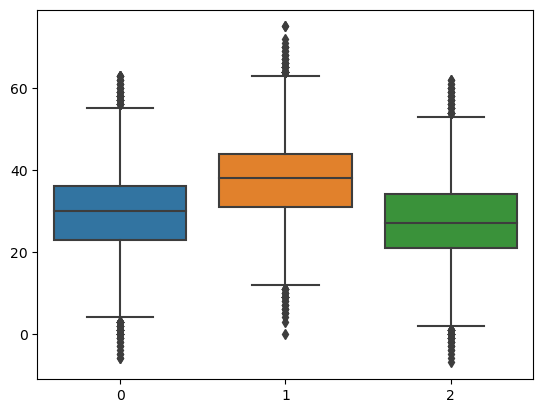

In [212]:
groups = [df_A.events, df_B.events, df_C.events]
sns.boxplot(groups)

In [213]:
for group in groups:
    print(stats.shapiro(group.sample(1000)))

ShapiroResult(statistic=0.9972510032584994, pvalue=0.08647919171367614)
ShapiroResult(statistic=0.9967870796073331, pvalue=0.040150474569922656)
ShapiroResult(statistic=0.9976718515833968, pvalue=0.17073345220057323)


<center> f_oneway

In [214]:
print('mean = ', [np.mean(groups[i]) for i in range(3)])
print('std = ', [np.std(groups[i]) for i in range(3)])

mean =  [29.5796, 37.6136, 27.4703]
std =  [10.07887215118834, 9.84786753769567, 9.958549990334886]


In [215]:
stats.f_oneway(*groups)

F_onewayResult(statistic=2886.166657438961, pvalue=0.0)

In [216]:
df

,id,group,events
0,16046,A,14
1,18712,A,41
2,3268,A,30
3,22633,A,37
4,28071,A,38
...,...,...,...
29995,22932,C,38
29996,21787,C,25
29997,5054,C,34
29998,10254,C,27


<center> Тьюки

In [217]:
pairwise_tukeyhsd(df['events'], df['group']).summary()

group1,group2,meandiff,p-adj,lower,upper,reject
A,B,8.034,0.0,7.7038,8.3642,True
A,C,-2.1093,0.0,-2.4395,-1.7791,True
B,C,-10.1433,0.0,-10.4735,-9.8131,True


Стат. различия есть между всеми группами, выбираем вторую (квадратные картинки), т.к. в ней среднее число заказов больше других

In [218]:
df = pd.read_csv("5_task_2.csv")
df

,id,group,segment,events
0,83440,test,high,78.0
1,96723,test,high,71.0
2,68719,test,high,80.0
3,50399,test,high,80.0
4,95613,test,high,78.0
...,...,...,...,...
99995,60695,control,low,15.0
99996,5934,control,low,16.0
99997,30046,control,low,22.0
99998,26474,control,low,21.0


In [219]:
df.isna().sum()

id         0
group      0
segment    0
events     0
dtype: int64

In [220]:
df.nunique()

id         100000
group           2
segment         2
events         97
dtype: int64

Сравниваем средние в разбивке по двум факторам ---> двуфакторный ANOVA

<center>Визуализация распределения events по группам

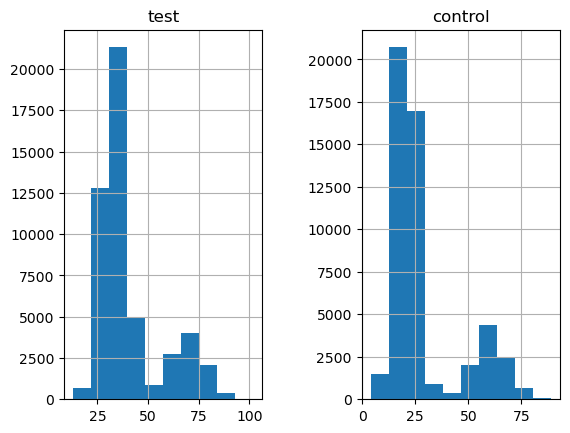

In [221]:
df_test = df.query("group == 'test'")
df_control = df.query("group == 'control'")

fig, ax = plt.subplots(1, 2)
plt.subplots_adjust(wspace=0.5)

df_test.events.hist(ax=ax[0])
ax[0].set_title('test')
df_control.events.hist(ax=ax[1])
ax[1].set_title('control');

In [222]:
df.groupby(['group', 'segment']).events.describe().round(2)

count   mean   std   min   25%   50%   75%    max
group   segment                                                     
control high     10000.0  59.97  7.81  31.0  55.0  60.0  65.0   89.0
        low      40000.0  20.03  4.47   4.0  17.0  20.0  23.0   41.0
test    high     10000.0  69.94  8.40  40.0  64.0  70.0  76.0  102.0
        low      40000.0  33.03  5.72  13.0  29.0  33.0  37.0   59.0

<center> Проверка предпосылок для ANOVA

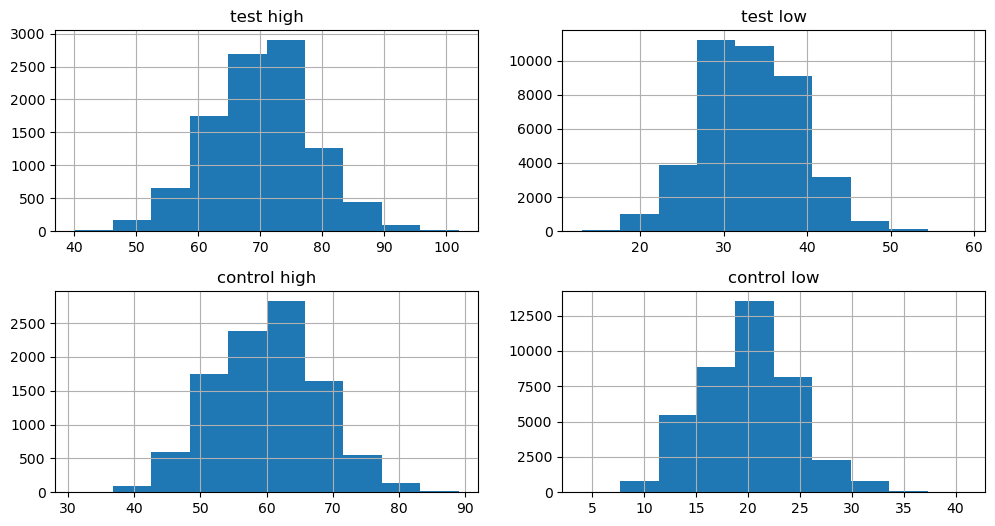

In [223]:
df_test_h = df_test.query("segment == 'high'")
df_test_l = df_test.query("segment == 'low'")
df_control_h = df_control.query("segment == 'high'")
df_control_l = df_control.query("segment == 'low'")

fig, ax = plt.subplots(2, 2, figsize=(12,6))
df_test_h.events.hist(ax=ax[0, 0])
ax[0, 0].set_title('test high')

df_test_l.events.hist(ax=ax[0, 1])
ax[0, 1].set_title('test low')

df_control_h.events.hist(ax=ax[1, 0])
ax[1, 0].set_title('control high')

df_control_l.events.hist(ax=ax[1, 1])
ax[1, 1].set_title('control low')

plt.subplots_adjust(hspace=0.3)

In [230]:
groups = [df_test_h.events, df_test_l.events, df_control_h.events, df_control_l.events]
for group in groups:
    print(stats.shapiro(group.sample(1000)))

ShapiroResult(statistic=0.9971486179446465, pvalue=0.07306795943151204)
ShapiroResult(statistic=0.9915200555232345, pvalue=1.645284867859965e-05)
ShapiroResult(statistic=0.9955219947537842, pvalue=0.005068700726422395)
ShapiroResult(statistic=0.991211381038284, pvalue=1.113096786812582e-05)


<AxesSubplot:>

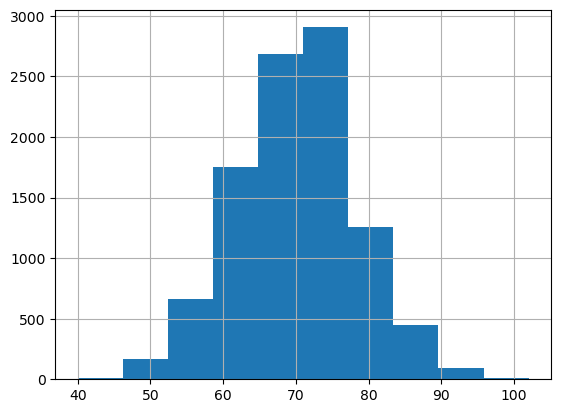

In [231]:
groups[0].hist()

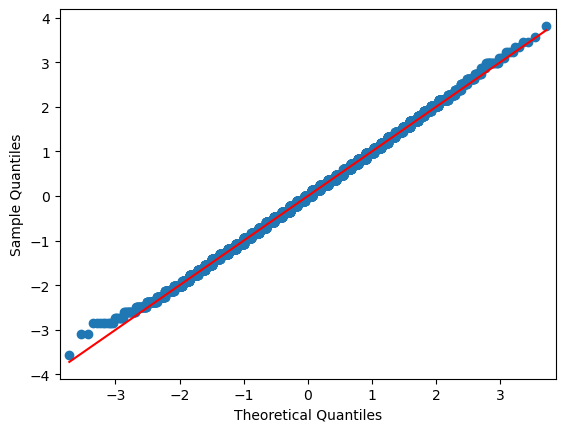

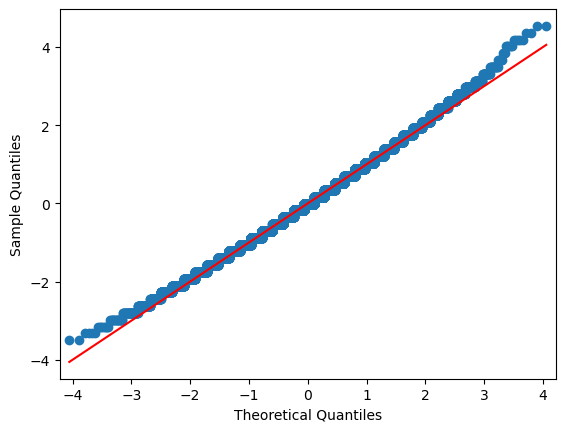

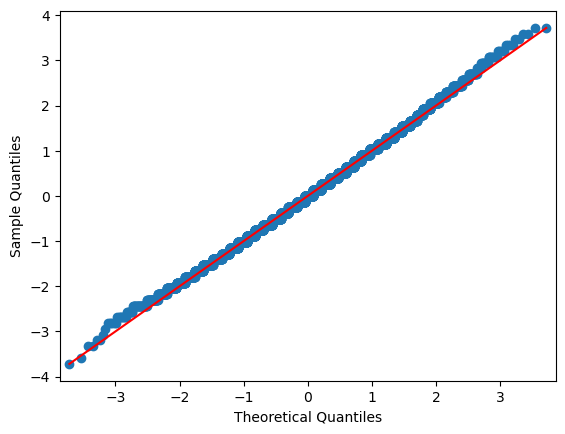

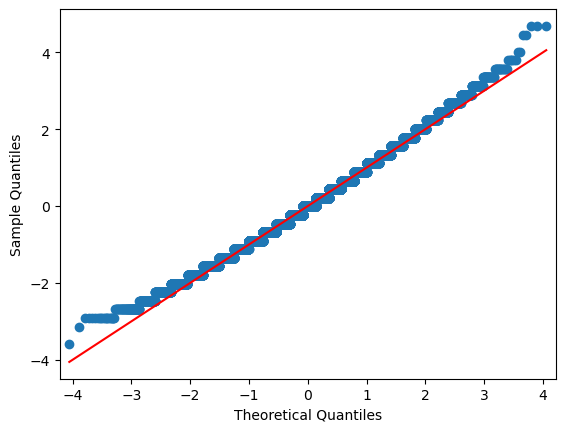

In [233]:
for group in groups:
    sm.qqplot(group, fit=True, line="s");

In [234]:
stats.levene(*groups)

LeveneResult(statistic=2983.609682903818, pvalue=0.0)

<center> Нормальность и гомогенность не соблюдаются